In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
df= pd.read_csv("/content/drive/MyDrive/Ml dataset/amazon_reviews_us_Office_Products_v1_00.tsv",delimiter='\t',on_bad_lines='skip')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31


In [4]:
df.shape

(2640254, 15)

In [21]:
df.dropna(inplace=True)

In [ ]:
print(df['marketplace'].unique())
print(df['product_parent'].unique().shape)
print(df['product_category'].unique().shape)
print(df['star_rating'].unique())
print(df['vine'].unique())

In [32]:
df.drop(columns=['marketplace','customer_id','review_id','product_id','product_parent','review_date','product_category'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640021 entries, 0 to 2640253
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   product_title      object 
 1   star_rating        object 
 2   helpful_votes      float64
 3   total_votes        float64
 4   vine               object 
 5   verified_purchase  object 
 6   review_headline    object 
 7   review_body        object 
dtypes: float64(2), object(6)
memory usage: 181.3+ MB


In [9]:
df.describe()

,helpful_votes,total_votes
count,2.640021e+06,2.640021e+06
mean,1.902366e+00,2.254735e+00
std,3.702390e+01,3.810024e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00
max,4.139300e+04,4.186600e+04


In [26]:
!python -m spacy download en_core_web_lg
!pip install spacy
import spacy
sp=spacy.load("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
def preprocess_for_NLP(text):
    modText=sp(text)
    if modText!=None and len(modText)!=0:
        text=" ".join([word.lemma_ for word in modText if not (word.is_stop or word.is_punct or word.is_quote)])
    return text.lower()


def preprocess_normal_datas(tempDf):
    tempDf['star_rating']=tempDf['star_rating'].apply(lambda x:int(float(str(x))))
    tempDf['verified_purchase']=tempDf['verified_purchase'].map({"N":0,"Y":1})
    tempDf['vine']=tempDf['vine'].map({"N":0,"Y":1})
    tempDf['product_title']=tempDf['product_title'].apply(preprocess_for_NLP)
    tempDf['review_headline']=tempDf['review_headline'].apply(preprocess_for_NLP)
    tempDf['review_body']=tempDf['review_body'].apply(preprocess_for_NLP)
    return tempDf


In [34]:
df=preprocess_normal_datas(df)

In [35]:
df.head()

,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
0,scotch cushion wrap 7961 12 inch x 100 foot,5,0,0,0,1,star,great product
1,dust compressed gas duster pack 4,5,0,1,0,1,phffffffft phfffffft lot air cool,commodity item come world.<br />have need bnuy...
2,amram tagger standard tag attaching tagging gu...,5,0,0,0,1,sure like,sure like
3,amazonbasics 12 sheet high security micro cut ...,1,2,3,0,1,shredder dirty bin partially shred paper,label 34;new&#34 receive clearly box previousl...
4,derwent colored pencils inktense ink pencils d...,4,0,0,0,1,star,gorgeous color easy use


LETS FIND THE SOME RELATIONSHIPS BTW

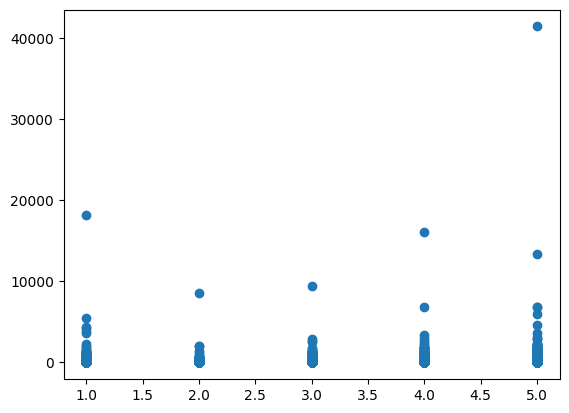

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['star_rating'],df['helpful_votes'])
plt.show()

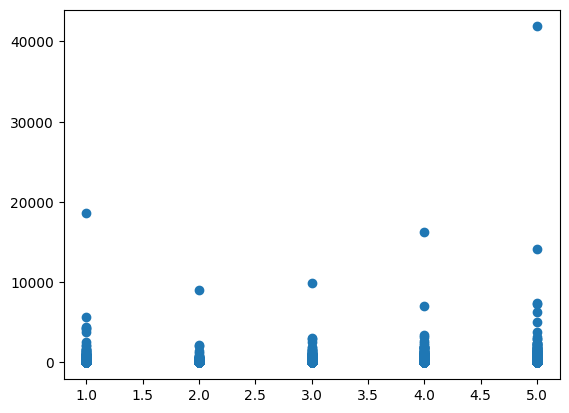

In [14]:
plt.scatter(df['star_rating'],df['total_votes'])

AS THE STAR RATING IS SAME FOR BOTH HELPFULL_VOTES AND TOTAL_VOTES, WE CAN DROP HELPFUL_VOTES

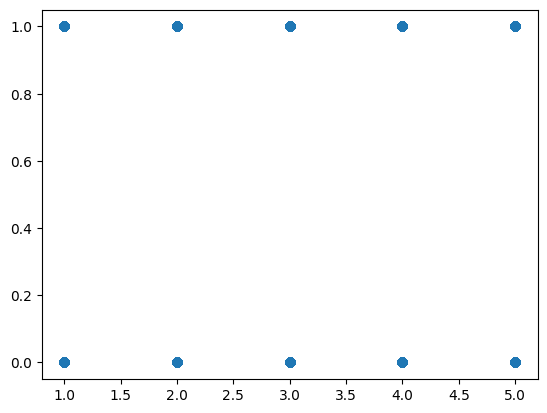

In [15]:
plt.scatter(df['star_rating'],df['vine'])

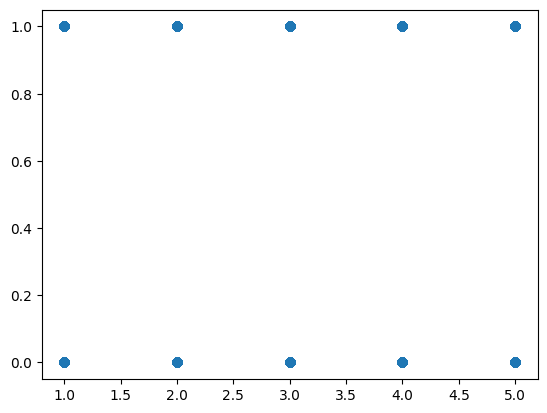

In [16]:
plt.scatter(df['star_rating'],df['verified_purchase'])

In [19]:
df.corr(numeric_only=True)

,star_rating,helpful_votes,total_votes,vine,verified_purchase
star_rating,1.000000,-0.015476,-0.022780,0.015546,0.133509
helpful_votes,-0.015476,1.000000,0.998732,0.006556,-0.043620
total_votes,-0.022780,0.998732,1.000000,0.006816,-0.048707
vine,0.015546,0.006556,0.006816,1.000000,-0.254926
verified_purchase,0.133509,-0.043620,-0.048707,-0.254926,1.000000


In [36]:
df.drop(columns=['helpful_votes','total_votes','vine'],inplace=True)


In [37]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['star_rating'])
X_train,X_test,y_train,y_test=train_test_split(X,df['star_rating'],random_state=20,test_size=0.2)



In [38]:
!pip install gensim

In [39]:
import numpy as np
sentences=[]
for column in ['product_title','review_headline','review_body']:
  for i in X_train[column]:
    sentences.append(i.split(" "))

 **Training word embedding using fasttext**

In [40]:
from gensim.models import FastText
model=FastText(sentences=sentences,vector_size=128,window=5,min_count=5,workers=4,epochs=10,seed=32,sg=1)
fastV=model.wv

Embedding Product Title, Review (Head and Body)

In [44]:
def embedding_process(col):
  col_array=[]
  for i in col:
    col_array.append(fastV.get_sentence_vector(i.split(" ")))
  tempDf=pd.DataFrame(col_array)
  return tempDf
def embeding_df(df):
  tempdf= pd.concat([embedding_process(df['product_title']),embedding_process(df['review_headline']),embedding_process(df['review_body'])],axis=1)
  finalDf=df.drop(columns=['product_title','review_headline','review_body'])
  finalDf=pd.concat([finalDf.reset_index(drop=True),tempdf.reset_index(drop=True)],axis=1)
  finalDf.columns=finalDf.columns.astype(str)
  return finalDf



In [45]:
X_train=embeding_df(X_train)
X_test=embeding_df(X_test)
X_train

,verified_purchase,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,1,0.091048,-0.123247,-0.096873,-0.017325,0.000075,0.140348,-0.141087,-0.119409,-0.005408,...,-0.027454,-0.002366,0.031311,-0.082238,0.018130,-0.006425,-0.051007,0.111254,-0.112480,0.089397
1,1,0.070755,-0.062506,-0.036380,-0.027987,0.028274,0.100536,-0.115853,-0.150108,0.006176,...,-0.062854,-0.050661,-0.018728,-0.001101,-0.032810,0.025898,0.016627,0.112797,-0.198302,0.184689
2,1,0.066034,-0.089547,-0.028316,-0.015447,0.035109,0.092958,-0.115283,-0.167209,0.024277,...,-0.044214,-0.035439,-0.019535,-0.028264,-0.010811,0.004674,0.016958,0.142494,-0.169397,0.158466
3,1,0.096791,-0.057604,-0.036767,-0.015368,0.033958,0.096481,-0.118845,-0.117953,-0.010070,...,-0.054235,-0.048431,0.022020,-0.027369,-0.026287,0.013819,-0.031197,0.094091,-0.177959,0.165156
4,1,0.068132,-0.061212,-0.053975,-0.017786,0.020648,0.091849,-0.112584,-0.138642,-0.000248,...,-0.055409,-0.054440,0.008244,-0.013667,-0.032348,0.016787,-0.018256,0.104574,-0.189946,0.181733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,0.077674,-0.062542,-0.030572,-0.024308,0.024164,0.089006,-0.102286,-0.140186,0.019396,...,-0.036820,-0.035539,-0.013294,-0.025851,-0.019508,0.009859,0.012040,0.125237,-0.168080,0.153496
796,1,0.088253,-0.099169,-0.080540,-0.024078,0.023189,0.121408,-0.119612,-0.145095,0.016388,...,-0.057529,-0.057408,0.013717,-0.019622,-0.032244,0.019766,-0.026548,0.096257,-0.188165,0.178140
797,1,0.074196,-0.102058,-0.013318,-0.024624,0.023573,0.108352,-0.128048,-0.174866,0.027108,...,-0.044964,-0.029389,-0.012711,-0.025068,-0.006708,0.007024,0.012860,0.134420,-0.169279,0.151507
798,1,0.078724,-0.053139,0.001983,-0.031474,0.032072,0.089088,-0.115580,-0.145596,0.021679,...,-0.045743,-0.036249,-0.010421,-0.026783,-0.021057,0.011315,0.001041,0.124676,-0.174759,0.160457


Normalizing with MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor
mb=RandomForestRegressor()
mb.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=mb.predict(X_test)
print(f"Mean_absolute_error: {mean_absolute_error(y_pred=y_pred,y_true=y_test)}")
print(f"Mean_squared_error: {mean_squared_error(y_pred=y_pred,y_true=y_test)}")
print(f"R2_score: {r2_score(y_pred=y_pred,y_true=y_test)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))}")


Mean_absolute_error: 1.0482
Mean_squared_error: 1.9087450000000001
R2_score: -0.0735499655506966
Root Mean Squared Error (RMSE): 1.3815733784348916
